<a href="https://colab.research.google.com/github/Suraez/tensorflow-hands_on/blob/main/MNIST_hello_world.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf

In [ ]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


### Data Exploration and Visualization Part

In [ ]:
type(x_train)

numpy.ndarray

In [ ]:
x_train.shape

(60000, 28, 28)

In [ ]:
y_train.shape

(60000,)

As you can see in [4] and [5] output, there are 60000 images in the training set as the first index in the tuple of both output are 60000. the x_train contains the tensor of 60000 images in shape (28,28) and y_train contains the label of each image in x_train.
 

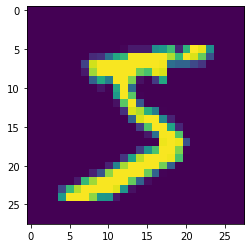

In [ ]:
from matplotlib import pyplot as plt
plt.imshow(x_train[0])

The above image looks like 5, right? let's find out the correct label using y_train

In [ ]:
y_train[0]

5

Similarly let's explore the testing dataset

In [ ]:
x_test.shape

(10000, 28, 28)

In [ ]:
y_test.shape

(10000,)

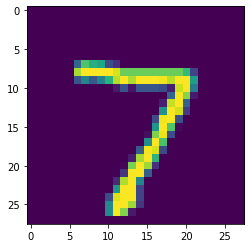

In [ ]:
plt.imshow(x_test[0])

Looks like the first image in training dataset is 7. let's find out

In [ ]:
y_test[0]

7

Just ask GPT about displaying mulitple images using matplotlib or see the documentation [here](https://matplotlib.org/stable/tutorials/introductory/quick_start.html)

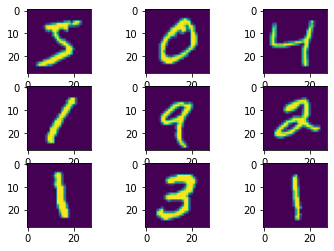

In [ ]:
fig, axs = plt.subplots(3,3)
k=0
for i in range(3):
  for j in range(3):
    axs[i,j].imshow(x_train[k])
    k += 1

In [ ]:
for i in range(9):
  print(y_train[i])

5
0
4
1
9
2
1
3
1


Alright now let's do the data preprocessing

Image preprocessing usually involves two steps:



*   Single-Channel Conversion: image need to be converted into single channel from 3 channel if not already.
*   Normalization: Each pixel value of the image need to be in [0-1].



Let's do the single-channel conversion first

In [ ]:
x_train = x_train.reshape((x_train.shape[0], 28, 28, 1))
x_test = x_test.reshape((x_test.shape[0], 28, 28, 1))

In [ ]:
x_train.shape

(60000, 28, 28, 1)

Now as we can the shape of x_train has changed from (60000, 28, 28) to (60000, 28, 28, 1) meaning that each image channel is changed from 3 to 1 now.



Next, let's do the normalization

In [ ]:
print(x_train[0])

[[[  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]]

 [[  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]]

 [[  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]]

 [[  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]]

 [[  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]


You can see that pixel value ranges from 0 - 255. we need to convert it into [0-1].

In [ ]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train = x_train / 255.0
x_test = x_test / 255.0

In [ ]:
x_train[0]

array([[[0.0000000e+00],
        [0.0000000e+00],
        [0.0000000e+00],
        [0.0000000e+00],
        [0.0000000e+00],
        [0.0000000e+00],
        [0.0000000e+00],
        [0.0000000e+00],
        [0.0000000e+00],
        [0.0000000e+00],
        [0.0000000e+00],
        [0.0000000e+00],
        [0.0000000e+00],
        [0.0000000e+00],
        [0.0000000e+00],
        [0.0000000e+00],
        [0.0000000e+00],
        [0.0000000e+00],
        [0.0000000e+00],
        [0.0000000e+00],
        [0.0000000e+00],
        [0.0000000e+00],
        [0.0000000e+00],
        [0.0000000e+00],
        [0.0000000e+00],
        [0.0000000e+00],
        [0.0000000e+00],
        [0.0000000e+00]],

       [[0.0000000e+00],
        [0.0000000e+00],
        [0.0000000e+00],
        [0.0000000e+00],
        [0.0000000e+00],
        [0.0000000e+00],
        [0.0000000e+00],
        [0.0000000e+00],
        [0.0000000e+00],
        [0.0000000e+00],
        [0.0000000e+00],
        [0.0000000e+00]

Now, we finally have the pre-processed MNIST image dataset. Next,let's work on defining the model architecture.

In [ ]:
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout, Conv1D, MaxPooling1D
from keras.models import Sequential 

In [ ]:
model = Sequential()

model.add(Conv2D(128, (3,3), activation="relu", input_shape=(28, 28, 1)))
model.add(MaxPooling2D(pool_size=(2,2)))

# 2nd layer
model.add(Conv2D(64, (3,3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

# 3rd layer
model.add(Conv2D(64, (3,3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

# 4th layer
model.add(Flatten())

model.add(Dense(10, activation="softmax"))
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])


In [ ]:
history = model.fit(x_train, y_train, batch_size=64, epochs=5, validation_data=(x_test, y_test))

Epoch 1/5
938/938 [==============================] - 175s 186ms/step - loss: 1.2050 - accuracy: 0.5847 - val_loss: 0.4465 - val_accuracy: 0.8549
Epoch 2/5
938/938 [==============================] - 173s 184ms/step - loss: 0.3800 - accuracy: 0.8831 - val_loss: 0.2915 - val_accuracy: 0.9083
Epoch 3/5
938/938 [==============================] - 175s 187ms/step - loss: 0.2777 - accuracy: 0.9153 - val_loss: 0.2251 - val_accuracy: 0.9278
Epoch 4/5
938/938 [==============================] - 174s 186ms/step - loss: 0.2281 - accuracy: 0.9304 - val_loss: 0.2013 - val_accuracy: 0.9359
Epoch 5/5
938/938 [==============================] - 174s 185ms/step - loss: 0.2008 - accuracy: 0.9379 - val_loss: 0.1784 - val_accuracy: 0.9439


In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

Now since there are 5 epochs, acc, val_acc, loss and val_loss each will have an array of 5 values

In [ ]:
print('accurcay is', acc)
print('val accurcay is', val_acc)
print('loss', loss)
print('val Loss is', val_loss)

accurcay is [0.584683358669281, 0.8831499814987183, 0.9153000116348267, 0.9303666949272156, 0.9379166960716248]
val accurcay is [0.8549000024795532, 0.90829998254776, 0.9277999997138977, 0.9358999729156494, 0.9438999891281128]
loss [1.2049667835235596, 0.3799833059310913, 0.2776782512664795, 0.22806479036808014, 0.20083142817020416]
val Loss is [0.44645464420318604, 0.29147857427597046, 0.22513720393180847, 0.20132037997245789, 0.17838332056999207]


let's plot the accuracy graph

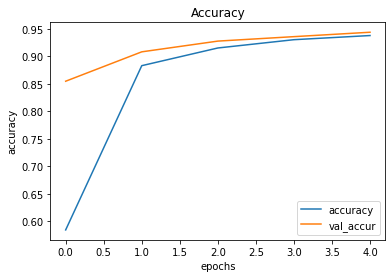

In [ ]:
plt.plot(acc)
plt.plot(val_acc)
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend(["accuracy", "val_accur"])
plt.title("Accuracy")
plt.show() 

let's plot the loss graph

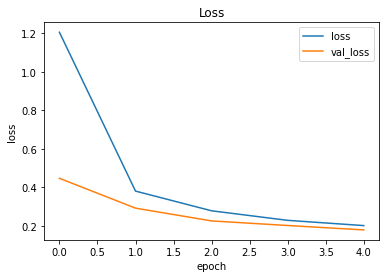

In [ ]:
plt.plot(loss)
plt.plot(val_loss)
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['loss', 'val_loss'])
plt.title('Loss')
plt.show()

Now let's draw a digit on white sheet paper and upload it here and test its performance

In [ ]:
dir

<function dir>

In [ ]:
ls

sample_data/


In [ ]:
import os
print(os.listdir())

['.config', 'sample_data']


In [ ]:
import cv2
test_image = cv2.imread('/content/test.jpg')

In [ ]:
test_image.shape

(4624, 3472, 3)

let's reshape the test image to (28, 28, 1) as in images shape in dataset

In [ ]:
from PIL import Image
import numpy as np

# Open the image
test_image = Image.open('/content/test.jpg')

# Resize the image to 28x28
test_image_resized = test_image.resize((28, 28))

# Convert the image to grayscale
test_image_gray = test_image_resized.convert('L')

# Convert the image to a numpy array
test_image_array = np.array(test_image_gray)

# Reshape the image to a 28x28x1 array
test_image_array = test_image_array.reshape((-1, 28, 28, 1))


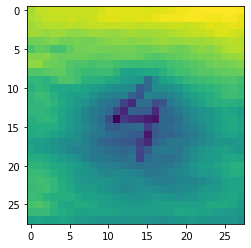

In [ ]:
plt.imshow(test_image_gray)

In [ ]:
model.predict(test_image_array)

1/1 [==============================] - 0s 102ms/step


array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

here the model is predicting that the digit in the image is 0, 2, 3, 9 as we have used the sigmoid function. let's use softmax activation function by changing the "sigmoid" to "softmax" in the last layer of model architecture. 

In [ ]:
def model_prediction(image_path):
  im = Image.open(image_path)
  im_resized = im.resize((28, 28))
  im_gray = im_resized.convert('L')
  im_array = np.array(im_gray)
  plt.imshow(im_array)
  # Add an additional dimension to the array
  im_array = im_array[np.newaxis, ...]
  # Reshape the image to a (1, 28, 28, 1) array
  im_array = im_array.reshape((1, 28, 28, 1))
  prediction = model.predict(im_array)
  print(prediction)
  return "the digit is " + str(np.argmax(prediction))


1/1 [==============================] - 0s 53ms/step
[[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]]


'the digit is 2'

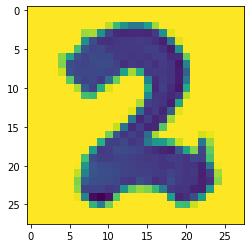

In [ ]:
model_prediction('/content/tst.jpg')